In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
data = pd.read_csv("abalone.data")

data = data.set_axis(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight ','Viscera weight','Shell weight','Rings'], axis=1, inplace=False)

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
# Since sex is not a purely physical measure, you should remove it from the dataset
data  = data .drop("Sex", axis=1)
data 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The target variable of this exercise is Rings

The histogram shows that most abalones in the dataset have between five and fifteen rings, 
but that it’s possible to get up to twenty-five rings.

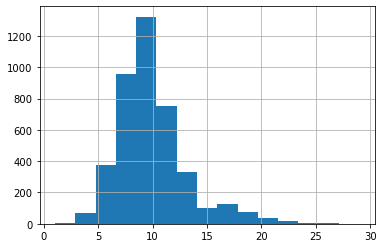

In [22]:
data["Rings"].hist(bins=15)
plt.show()

In [29]:
correlation_matrix = data.corr()
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [44]:
# get pandas DataFrame into a NumPy array using the .values attribute
X = data["Height"]
X = X.values
y = data["Whole weight"]
y = y.values

In [45]:
# Splitting Data Into Training and Test Sets for Model Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from knn import KNearestNeighbors

In [10]:
# fit the model. For kNN, this means that the training data will be used as neighbors.
my_knn = KNearestNeighbors(k=3)
my_knn.fit(X_train,y_train)

# make predictions for the number of rings of each of the abalones in
# the test data and compare those results to the known true number of rings.
answer = my_knn.predict(X_test)

 To understand what the model has learned, you can visualize how your predictions have been made using Matplotlib

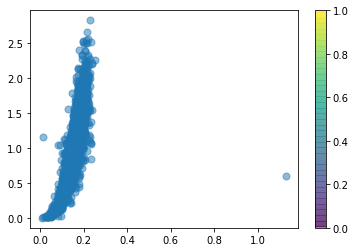

In [46]:
# On this graph, each point is an abalone from the test set, 
# with its actual length and actual diameter on the X- and Y-axis, respectively. 
plt.scatter(X_train, y_train, s=50,alpha = 0.5, cmap="nipy_spectral")

# The color of the point reflects the predicted age.
plt.colorbar()
plt.show()

To confirm whether this trend exists in actual abalone data,you can do the same

for the actual values by simply replacing the variable that is used for c:

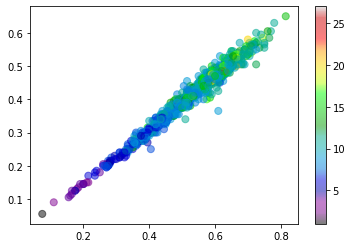

In [12]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50,alpha = 0.5, cmap="nipy_spectral")

plt.colorbar()
plt.show()